In [175]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile 
from matplotlib import pyplot as plt
import requests
from scipy import stats

#from the excel  read sheet : Boys
boys_df_xlsx = pd.read_excel('Resources/UK baby names/allbabynames1996to2017.xls',header=[2],sheet_name='Boys')
#forward fill the NA values in index 0 
boys_df_xlsx.loc[0] = boys_df_xlsx.iloc[0].fillna(method='ffill')
#using multi-index function mention the rows to be headers
boys_df_xlsx.columns=pd.MultiIndex.from_arrays(boys_df_xlsx[:2].values)
boys_df_xlsx = boys_df_xlsx.iloc[2:15233]
#drop column rank to look the names by count
boys_df = boys_df_xlsx.drop('Rank', axis=1, level=1)
#drop multi index column - count to view by year
boys_df.columns=boys_df.columns.droplevel(1)
# # boys_df.reset_index()
#convert column names to type string
boys_df.columns = boys_df.columns.astype(str)
#rename nan column name to Names 
boys_df.rename(columns={'nan':'Names'}, inplace=True)
#using str split remove '.0' from the columns representing year
boys_df.columns = boys_df.columns.str.split(".", 0).str[0]
boys_df.replace(':',0,inplace=True)
# #get the last valid value
# last_valid_value = boys_df['Names'].last_valid_index()+1
# #get the last valid value to clean up the data with Nan names 
# boys_df = boys_df.iloc[2:last_valid_value]
#add gender column to the dataframe
boys_df['gender'] = "M"
#from the excel  read sheet : Girls
girls_df_xlsx = pd.read_excel('Resources/UK baby names/allbabynames1996to2017.xls',header=[2],sheet_name='Girls')
#forward fill the NA values in index 0 
girls_df_xlsx.loc[0] = girls_df_xlsx.iloc[0].fillna(method='ffill')
#using multi-index function mention the rows to be headers
girls_df_xlsx.columns=pd.MultiIndex.from_arrays(girls_df_xlsx[:2].values)
girls_df_xlsx = girls_df_xlsx.iloc[2:19974]
#drop column rank to look the names by count
girls_df = girls_df_xlsx.drop('Rank', axis=1, level=1)
#drop multi index column - count to view by year
girls_df.columns=girls_df.columns.droplevel(1)
#convert column names to type string
girls_df.columns = girls_df.columns.astype(str)
#rename nan column name to Names 
girls_df.rename(columns={'nan':'Names'}, inplace=True)
#using str split remove '.0' from the columns representing year
girls_df.columns = girls_df.columns.str.split(".", 0).str[0]
girls_df.replace(':',0,inplace=True)
# #get the last valid value
# last_valid_value = girls_df['Names'].last_valid_index()+1
# girls_df = girls_df.iloc[2:last_valid_value]
#add gender column to the dataframe
girls_df['gender'] = "F"
girls_df.head()


,Names,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,gender
2,AABIDAH,0,4,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,F
3,AABISH,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,F
4,AADHIRA,0,4,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,F
5,AADHYA,30,33,28,30,17,15,5,0,0,...,0,0,0,0,0,0,0,0,0,F
6,AADILA,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,F


In [176]:
#a list to hold the GoT 5 popular names. Loop through this list to create scatter plot
# add (name, gender, color) to got_names list to add to scatter plot
got_names_list = [("Arya","F","b"),
            # ("Arya","M","b"),
             ("Daenerys","F","y"),
             ("Jon","M","r"),
             ("Khaleesi","F","c"),
             ("Sansa","F","m")
            ]
#combine boys and girls datframe to a single dataframe - names_UK
names_UK = pd.concat([girls_df, boys_df])
#remove the spaces in the names
names_UK["Names"] = names_UK["Names"].str.strip()
#Using pd.melt function unpivot the year column from wide to long format
names_UKT = pd.melt(names_UK, id_vars=['Names','gender'], value_vars=['1996', '1997', '1998',
'1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', 
'2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])
#Rename the columns of our variable and values
names_UKT.rename(columns={'variable':'year',
                             'value' : 'count_names'}, inplace=True)
names_UKT.head()
names_UKT.to_csv('all_names_UKT.csv')

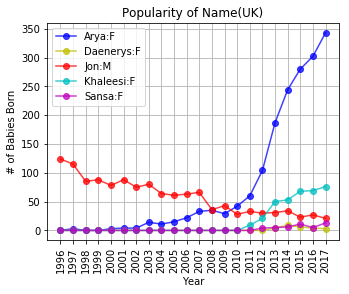

In [177]:

#Convert the got_names to uppercase to match the UK naming format
got_names = [item[0].upper() for item in got_names_list ]
# #print(got_names)
#create a new dataframe got_names_UK with only the got_names in the names_UKT
got_names_UKT  = names_UKT.loc[names_UKT["Names"].isin(got_names)]
got_names_UKT
handles = []
#looping through the got_names list , create a scatter plot
for i in got_names_list:
    plotting = got_names_UKT.loc[(got_names_UKT["Names"]==i[0].upper()) & (got_names_UKT["gender"]==i[1]) ]
    #print(plotting)
#Daenerys = got_names_UKT.loc[got_names_UKT["Names"]== "DAENERYS"]
    x_axis = plotting.year
    y_axis = plotting.count_names
    handles.append(plt.plot(x_axis,y_axis,
                marker="o",
                     c=i[2],
                     label=i[0]+':'+i[1],
                     alpha=0.75 ))
#format the plotting with title,labels and legend and save the figure    
plt.xticks(rotation=90)
plt.title("Popularity of Name(UK)")
plt.xlabel("Year")
plt.ylabel("# of Babies Born")
#print("here")
plt.grid()
plt.legend(loc='best')
plt.subplots_adjust(right=0.8)
plt.savefig("mixed_GOT_names_UK.png")
plt.show()

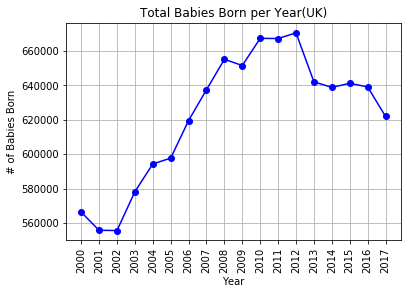

In [178]:
#create a new dataframe names_UKT_df to plot the total_babies born per year using group by
names_UKT_df = pd.DataFrame({
                    'total_babies' : names_UKT.groupby(['year'])['count_names'].sum()})
names_UKT_df = names_UKT_df[4:]

plt.plot(names_UKT_df.index.values, names_UKT_df['total_babies'], marker='o', c="b")
plt.xticks(rotation=90)
plt.title("Total Babies Born per Year(UK)")
plt.xlabel("Year")
plt.ylabel("# of Babies Born")
plt.grid()
plt.savefig("total_baby_names_UK.png")
plt.show()
#interesting note: Sharp change in babies born per year around '13. 

In [179]:
#Drop Count instead of Rank to see by Rank from sheet boys
boys_df_rank = boys_df_xlsx.drop('Count', axis=1, level=1)
boys_df_rank.columns=boys_df_rank.columns.droplevel(1)
# # boys_df.reset_index()

boys_df_rank.columns = boys_df_rank.columns.astype(str)
boys_df_rank.rename(columns={'nan':'Names'}, inplace=True)
boys_df_rank.columns = boys_df_rank.columns.str.split(".", 0).str[0]
boys_df_rank.replace(':',0,inplace=True)
boys_df_rank['gender'] = "M"
#Drop Count instead of Rank to see by Rank from sheet Girls
girls_df_rank = girls_df_xlsx.drop('Count', axis=1, level=1)
girls_df_rank.columns=girls_df_rank.columns.droplevel(1)
# # boys_df.reset_index()

girls_df_rank.columns = girls_df_rank.columns.astype(str)
girls_df_rank.rename(columns={'nan':'Names'}, inplace=True)
girls_df_rank.columns = girls_df_rank.columns.str.split(".", 0).str[0]
girls_df_rank.replace(':',0,inplace=True)
girls_df_rank['gender'] = "F"
#concate boys_df and girls_df to a single dataframe - names_UK_rank
names_UK_rank = pd.concat([girls_df, boys_df])
names_UK_rank["Names"] = names_UK["Names"].str.strip()
#names_UK = names_UK.set_index("Names")
#names_UK_rank
names_UK_rank = pd.melt(names_UK, id_vars=['Names','gender'], value_vars=['1996', '1997', '1998',
'2000', '2001', '2002', '2003', '2004', '2005', '2006', 
'2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])
names_UK_rank.rename(columns={'variable':'year',
                              'value' : 'Rank'}, inplace=True)
#names_UK_rank.to_csv('all_names_UK_rank.csv')
names_UK_rank
#find rank of Arya in 2011
arya_rank_2011 = names_UK_rank['Rank'].loc[(names_UK_rank["Names"] == "ARYA" ) & (names_UK_rank["year"]== '2011')
                                 & (names_UK_rank["gender"]== "F") ].values
#print(arya_rank_2011[0])
#find similarly ranked to arya
arya_rank_df = names_UK_rank.loc[(names_UK_rank["Names"]=="ARYA") & (names_UK_rank["year"]== '2011') & (names_UK_rank["gender"]== "F")]
arya_ranks_df = names_UK_rank.loc[(names_UK_rank["Rank"] == arya_rank_2011[0] ) & (names_UK_rank["year"]== '2011')]
top5_arya_df = arya_ranks_df[:7]
top5_arya_df
top5 = top5_arya_df['Names'].values
print(top5)

['ARYA' 'DULCIE' 'ELLA-MAE' 'FEARNE' 'JAZMINE' 'MAHNOOR' 'NAIMA']


In [180]:
#Find p_value for Arya female using stats module
Arya_regres_Fdf = names_UKT.loc[(names_UKT["Names"]=="ARYA") & (names_UKT["gender"]=="F") & (names_UKT["year"].astype(int) >= 2003) ]
Arya_regres_Fdf
pfvalue = stats.linregress(Arya_regres_Fdf["year"].astype(int),Arya_regres_Fdf["count_names"])
ARYA_Female_pvalue = f"ARYA p value for female: {pfvalue.pvalue}"
print(ARYA_Female_pvalue)

ARYA p value for female: 2.4207357075846425e-06


In [181]:
#Find p_value for Arya Male using stats module
Arya_regres_Mdf = names_UKT.loc[(names_UKT["Names"]=="ARYA") & (names_UKT["gender"]=="M") & (names_UKT["year"].astype(int) >= 2003)]
Arya_regres_Mdf
#slope, intercept, rvalue,p_value, stderr 
pmvalue= stats.linregress(Arya_regres_Mdf["year"].astype(int),Arya_regres_Mdf["count_names"])
ARYA_Male_pvalue = f"ARYA p value for male: {pmvalue.pvalue}"
print(ARYA_Male_pvalue)


ARYA p value for male: 0.9379491729181968


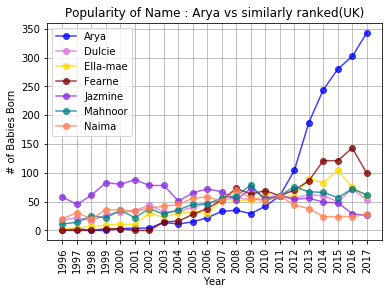

In [182]:
#a list to hold the similarly ranked names as ARYA. Loop through this list to create scatter plot
top5_names_list = [("Arya","F","b"),
             ("Dulcie","F","orchid")
             ,("Ella-mae","F","gold"),
             ("Fearne","F","maroon"),
             ("Jazmine","F","blueviolet"),
            ("Mahnoor","F", "teal"),
            ("Naima","F", "coral")     
            ]
#convert  names in to uppercase 
arya_trend_list = [item for item in top5 ]
#print(arya_trend_list)
#lookup names similarly ranked and put it into a new dataframe
arya5_names_UKT  = names_UKT.loc[names_UKT["Names"].isin(arya_trend_list)]
arya5_names_UKT
#loop through the top5_names_list and create scatter
handles = []
for i in top5_names_list:
    plotting = arya5_names_UKT.loc[(arya5_names_UKT["Names"]==i[0].upper()) & (arya5_names_UKT["gender"]==i[1]) ]
    #print(plotting)
#Daenerys = got_names_UKT.loc[got_names_UKT["Names"]== "DAENERYS"]
    x_axis = plotting.year
    y_axis = plotting.count_names
    handles.append(plt.plot(x_axis,y_axis,
                marker="o",
                     c=i[2],
                     label=i[0],
                     alpha=0.75 ))
    
    
plt.xticks(rotation=90)
plt.title("Popularity of Name : Arya vs similarly ranked(UK)")
plt.xlabel("Year")
plt.ylabel("# of Babies Born")
#print("here")
plt.grid()

plt.legend(loc='best')
# plt.subplots_adjust(right=0.8)
#plt.fig(figsize=(30,30))
#plt.text(1, 180,"ARYA-F (p_value): 2.4207357075846425e-06\nARYA-M (p_value): 0.9379491729181968", fontsize=10)

plt.savefig("arya_vs_similarly_ranked_UK.png")
plt.show()


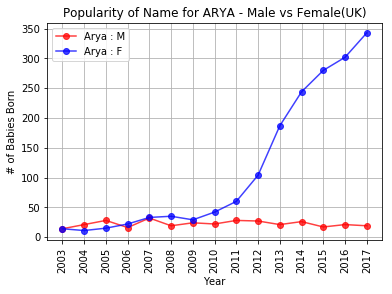

In [183]:
#find popularity of ARYA female vs male from the dataframes created -Arya_regres_Mdf & Arya_regres_Fdf 
plt.plot(Arya_regres_Mdf["year"],Arya_regres_Mdf["count_names"],
                marker="o",
                     color="r",
                     label= "Arya : M",
                     alpha=0.75 )
plt.plot(Arya_regres_Fdf["year"],Arya_regres_Fdf["count_names"],
                marker="o",
                     color="b",
                     label= "Arya : F",
                     alpha=0.75 )
plt.xticks(rotation=90)
plt.title("Popularity of Name for ARYA - Male vs Female(UK)")
plt.xlabel("Year")
plt.ylabel("# of Babies Born")
#print("here")
plt.grid()
plt.legend(loc='best')
# plt.subplots_adjust(right=0.8)
#plt.figure(figsize=(30,30))
plt.savefig("arya_male_vs_female_UK.png")
plt.show()